## Problem Statement: To build a CNN model that would classify if subject has a tumor or not based on MRI scan images. 

In [1]:
import os
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import choices
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,BatchNormalization,Flatten,Dropout
import cv2

In [2]:
input_path='dataset/'
for file in os.listdir(input_path):
    print(file)

no
yes


**Let's visualize the total number of labels of each type in dataset**

C:\Users\itsro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

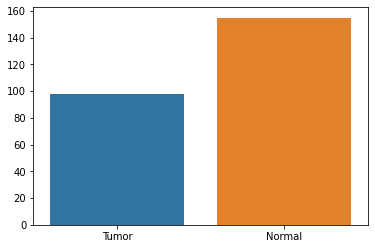

In [3]:
type1=len(os.listdir(input_path+'/no'))
type2=len(os.listdir(input_path+'/yes'))

count=[type1,type2]
label=['Tumor','Normal']
data=[[count],[label]]

sns.barplot(label,count)

In [4]:
def show_image(folder):
    path=os.path.join(input_path,folder)
    
    images=choices(os.listdir(path),k=4)
    images=[os.path.join(path,file) for file in images]
    
    return images

**Let's see how the MRI scan of each type looks. We would be using open cv library to read and show the image.**

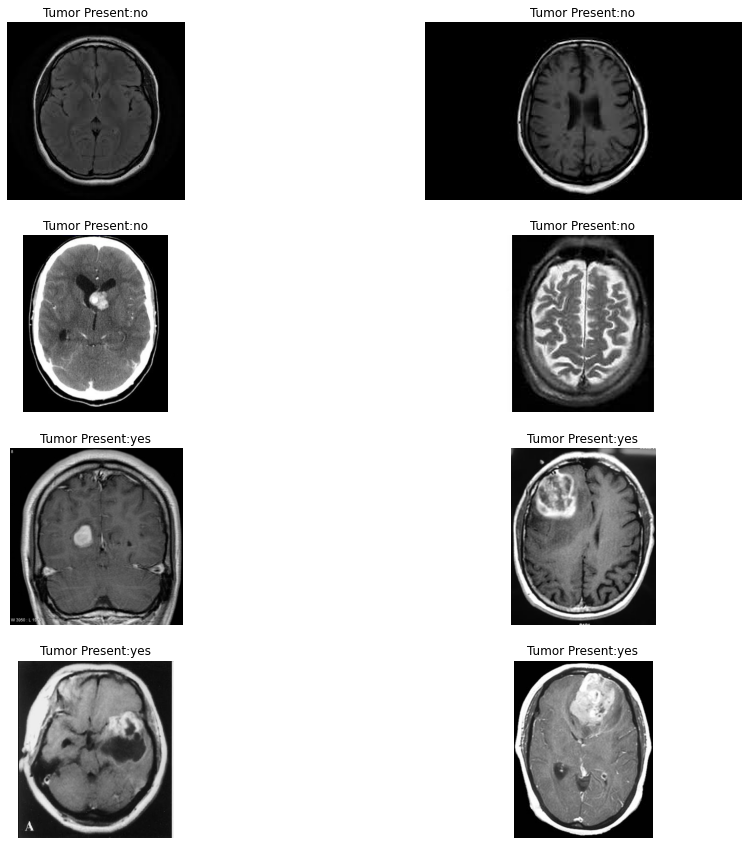

In [5]:
img1=show_image('no')
img2=show_image('yes')
label1=['no']*4
label2=['yes']*4

images=img1+img2
labels=label1+label2

plt.figure(figsize=(16,15))

for i,path_name in enumerate(images):
    plt.subplot(4,2,i+1)
    image=cv.imread(path_name)
    plt.imshow(image)
    plt.title("Tumor Present:"+labels[i])
    plt.axis('off')

In [6]:
yes=os.listdir('dataset/yes')
no=os.listdir('dataset/no')

In [7]:
data=np.concatenate([yes,no])
data

array(['Y1.jpg', 'Y10.jpg', 'Y100.JPG', 'Y101.jpg', 'Y102.jpg',
       'Y103.jpg', 'Y104.jpg', 'Y105.jpg', 'Y106.jpg', 'Y107.jpg',
       'Y108.jpg', 'Y109.JPG', 'Y11.jpg', 'Y111.JPG', 'Y112.JPG',
       'Y113.JPG', 'Y114.JPG', 'Y115.JPG', 'Y116.JPG', 'Y117.JPG',
       'Y12.jpg', 'Y120.JPG', 'Y13.jpg', 'Y14.jpg', 'Y146.JPG',
       'Y147.JPG', 'Y148.JPG', 'Y15.jpg', 'Y153.jpg', 'Y154.jpg',
       'Y155.JPG', 'Y156.JPG', 'Y157.JPG', 'Y158.JPG', 'Y159.JPG',
       'Y16.JPG', 'Y160.JPG', 'Y161.JPG', 'Y162.jpg', 'Y163.JPG',
       'Y164.JPG', 'Y165.JPG', 'Y166.JPG', 'Y167.JPG', 'Y168.jpg',
       'Y169.jpg', 'Y17.jpg', 'Y170.JPG', 'Y18.JPG', 'Y180.jpg',
       'Y181.jpg', 'Y182.JPG', 'Y183.jpg', 'Y184.JPG', 'Y185.jpg',
       'Y186.jpg', 'Y187.jpg', 'Y188.jpg', 'Y19.JPG', 'Y192.JPG',
       'Y193.JPG', 'Y194.jpg', 'Y195.JPG', 'Y2.jpg', 'Y20.jpg', 'Y21.jpg',
       'Y22.jpg', 'Y23.JPG', 'Y24.jpg', 'Y242.JPG', 'Y243.JPG',
       'Y244.JPG', 'Y245.jpg', 'Y246.JPG', 'Y247.JPG', 'Y248.JPG',
  

In [8]:
import numpy as np
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target=np.concatenate([target_x,target_y])
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
X_data =[]
for file in yes:
    img = cv2.imread('dataset/yes/'+file)
    face = cv2.resize(img, (128, 128) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [10]:
for file in no:
    img = cv2.imread('dataset/no/'+file)
    face = cv2.resize(img, (128, 128) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [11]:
X = np.squeeze(X_data)

In [12]:
X.shape

(253, 128, 128, 3)

**Rescale the Images by Dividing Every Pixel in Every Image by 255**

In [13]:
# normalize data
X = X.astype('float32')
X /= 255

**Break Dataset into Training, Testing, and Validation Sets**

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data_target, test_size=0.3, random_state=32)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (128, 128, 3)
Shape of an image in X_test:  (128, 128, 3)


In [15]:
(X_train, X_valid) = X_train[:120], X_train[120:]
(y_train, y_valid) = y_train[:120], y_train[120:]

In [16]:
print('X_train shape:', X_train.shape)

# print number of training, validation, and test images
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_valid.shape[0], 'validation samples')

X_train shape: (120, 128, 128, 3)
120 train samples
76 test samples
57 validation samples


## Data Augmentation

In [17]:
from keras.preprocessing.image import ImageDataGenerator

# create and configure augmented image generator
datagen_train = ImageDataGenerator(
    width_shift_range=0.1,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.1,  # randomly shift images vertically (10% of total height)
    horizontal_flip=True) # randomly flip images horizontally

# fit augmented image generator on data
datagen_train.fit(X_train)


**Visualize Original and Augmented Images**

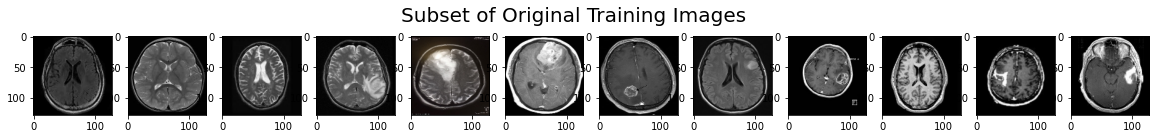

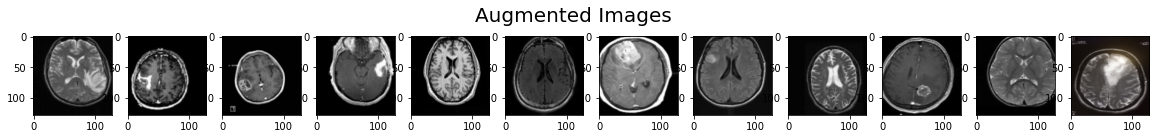

In [18]:
import matplotlib.pyplot as plt

# take subset of training data
X_train_subset = X_train[:12]

# visualize subset of training data
fig = plt.figure(figsize=(20,2))
for i in range(0, len(X_train_subset)):
    ax = fig.add_subplot(1, 12, i+1)
    ax.imshow(X_train_subset[i])
fig.suptitle('Subset of Original Training Images', fontsize=20)
plt.show()

# visualize augmented images
fig = plt.figure(figsize=(20,2))
for x_batch in datagen_train.flow(X_train_subset, batch_size=12):
    for i in range(0, 12):
        ax = fig.add_subplot(1, 12, i+1)
        ax.imshow(x_batch[i])
    fig.suptitle('Augmented Images', fontsize=20)
    plt.show()
    break;

# Model building

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0

**Compile the Model**

In [20]:
# compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])

**Train the Model**

In [21]:
from keras.callbacks import ModelCheckpoint   

batch_size = 16
epochs = 100

# train the model
checkpointer = ModelCheckpoint(filepath='model.hdf5', verbose=1, 
                               save_best_only=True)
history=model.fit_generator(datagen_train.flow(X_train, y_train, batch_size=batch_size),
                    epochs=epochs, verbose=2, callbacks=[checkpointer],
                    validation_data=(X_valid, y_valid))

C:\Users\itsro\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
8/8 - 6s - loss: 0.7961 - accuracy: 0.5917 - val_loss: 0.7068 - val_accuracy: 0.6316

Epoch 00001: val_loss improved from inf to 0.70685, saving model to model.hdf5
Epoch 2/100
8/8 - 1s - loss: 0.5907 - accuracy: 0.6917 - val_loss: 0.5289 - val_accuracy: 0.7719

Epoch 00002: val_loss improved from 0.70685 to 0.52885, saving model to model.hdf5
Epoch 3/100
8/8 - 1s - loss: 0.5645 - accuracy: 0.7167 - val_loss: 0.5797 - val_accuracy: 0.7544

Epoch 00003: val_loss did not improve from 0.52885
Epoch 4/100
8/8 - 1s - loss: 0.5888 - accuracy: 0.7167 - val_loss: 0.5572 - val_accuracy: 0.7368

Epoch 00004: val_loss did not improve from 0.52885
Epoch 5/100
8/8 - 1s - loss: 0.5512 - accuracy: 0.7583 - val_loss: 0.5368 - val_accuracy: 0.7368

Epoch 00005: val_loss did not improve from 0.52885
Epoch 6/100
8/8 - 1s - loss: 0.5672 - accuracy: 0.7083 - val_loss: 0.5647 - val_accuracy: 0.7368

Epoch 00006: val_loss did not improve from 0.52885
Epoch 7/100
8/8 - 1s - loss: 0.5442 - accuracy


Epoch 00055: val_loss did not improve from 0.52885
Epoch 56/100
8/8 - 1s - loss: 0.2902 - accuracy: 0.8833 - val_loss: 0.6762 - val_accuracy: 0.8070

Epoch 00056: val_loss did not improve from 0.52885
Epoch 57/100
8/8 - 1s - loss: 0.2910 - accuracy: 0.8750 - val_loss: 0.7654 - val_accuracy: 0.8421

Epoch 00057: val_loss did not improve from 0.52885
Epoch 58/100
8/8 - 1s - loss: 0.2267 - accuracy: 0.9167 - val_loss: 0.6947 - val_accuracy: 0.8070

Epoch 00058: val_loss did not improve from 0.52885
Epoch 59/100
8/8 - 1s - loss: 0.2080 - accuracy: 0.9167 - val_loss: 0.8045 - val_accuracy: 0.8070

Epoch 00059: val_loss did not improve from 0.52885
Epoch 60/100
8/8 - 1s - loss: 0.2284 - accuracy: 0.9167 - val_loss: 0.8966 - val_accuracy: 0.8246

Epoch 00060: val_loss did not improve from 0.52885
Epoch 61/100
8/8 - 1s - loss: 0.2867 - accuracy: 0.8917 - val_loss: 0.7438 - val_accuracy: 0.7895

Epoch 00061: val_loss did not improve from 0.52885
Epoch 62/100
8/8 - 1s - loss: 0.3421 - accuracy:

**Load the Model with the Best Validation Accuracy**

In [23]:
# evaluate and print test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8552631735801697


**Classification Report**

In [24]:
predictions = model.predict_classes(X_test)

C:\Users\itsro\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81        32
           1       0.84      0.93      0.88        44

    accuracy                           0.86        76
   macro avg       0.86      0.84      0.85        76
weighted avg       0.86      0.86      0.85        76



In [23]:
my_image = X_test[14]

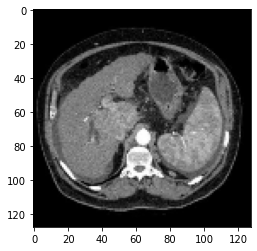

In [24]:
plt.imshow(my_image.reshape(128,128,3))

In [25]:
model.predict_classes(my_image.reshape(1,128,128,3))

C:\Users\itsro\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0], dtype=int64)

In [26]:
model.save('model.h5')

In [27]:
import shap

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


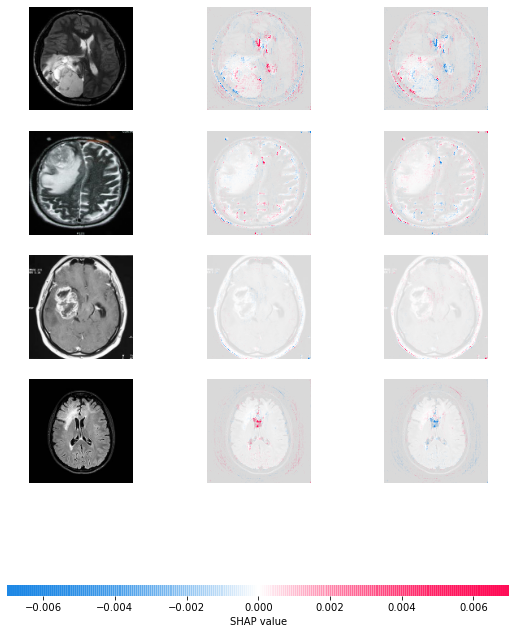

In [28]:
background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]
# We will use the GradientExplainer from Deep LIFT to explain any 4 random examples.
e = shap.GradientExplainer(model, background)
shap_values = e.shap_values(X_test[1:5])
# For plotting the feature attributions
shap.image_plot(shap_values, X_test[1:5])